In [1]:
%load_ext autoreload
%autoreload 2

## development

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import scipy.optimize as opt
from tqdm import tqdm
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [3]:
filename = 'pareto_low_adv_refit.csv'  
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/'+filename)

df_full = pd.read_csv('SMBH_Data_03_06_24.csv',header=1)

In [4]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','log<Sigma>_e','log<Sigma>_h','M_BH']

easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','log_n_sph_maj','logR10','Pseudobulge','AGN','Multiple','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','log10(R10_kpc)','log10(R90_kpc)','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)','M_BH']

#low_scatter_para.append('M_BH_std_sym')
#easy_obs_para.append('M_BH_std_sym')
std_white_list=['ube_std', 'bri25_std', 'bve_std', 'Pseudobulge_std', 'AGN_std', 'Multiple_std', 'Ring_std', 'BCG_std', 'Disk_std', 'cD_std', 'Bar_std', 'Core_std', 'Compactness_std', 'ETG_std', 'M_BH_std']

In [5]:
easy_obs_para_std=easy_obs_para.copy()
for i in easy_obs_para:
    easy_obs_para_std.append(i+'_std')

low_scatter_para.append('M_BH_std_sym')
easy_obs_para.append('M_BH_std_sym')

# remove std_white_list from easy_obs_para_std
for i in std_white_list:
    easy_obs_para_std.remove(i)

In [6]:
df=df_full[easy_obs_para]
df=df.dropna()
len(df)

93

In [7]:
df=df_full[easy_obs_para_std]
# drop the column with all nan
df=df.dropna(axis=1,how='all')
df=df.dropna()
len(df)

28

In [8]:
df=df_full[low_scatter_para]
df=df.dropna()
len(df)

93

In [9]:
df=df_full[low_scatter_para+['log_sigma0_std']]
df=df.dropna()
len(df)

93

In [10]:
t_eq[t_eq['complexity']==5]

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,evolutions,iterations,fitting_format,num_fitting_variables,initial_constant_guess,LLL,intrinsic_scatter,refit_equation,refit_wrmse
7,5,0.200727,0.351925,(x66 + (x14 + -1.1261230669061786)),x14 + x66 - 1.1261230669061786,PySRFunction(X=>x14 + x66 - 1.1261230669061786),1,"{'x14', 'x66'}",2,2,0,1,x14 + x66 - p[0],1,['1.12612306690618'],-129.299340,0.536760,x14 + x66 - 1.3121172233613136,0.244346
39,5,0.127359,0.104465,(x66 + (x53 * 1.1296085297934293)),1.1296085297934293*x53 + x66,PySRFunction(X=>1.1296085297934293*x53 + x66),1,"{'x53', 'x66'}",2,2,0,8,p[0]*x53 + x66,1,['1.12960852979343'],-100.699846,0.496615,1.1931517145871606*x53 + x66,0.134962
90,5,0.092289,0.203158,((x15 / 0.5304325783227015) ^ 1.4542179540609008),2.5144773149553047*x15**1.4542179540609008,PySRFunction(X=>2.5144773149553047*x15**1.4542...,2,{'x15'},1,1,0,128,p[0]*x15**p[1],2,"['2.5144773149553', '1.4542179540609']",-84.352388,0.444909,2.705888732459601*x15**1.3478371950830068,0.112183
106,5,0.092289,0.221640,((x15 / 0.5304072887645501) ^ 1.4541694754970373),2.5145743605544886*x15**1.4541694754970373,PySRFunction(X=>2.5145743605544886*x15**1.4541...,2,{'x15'},1,1,0,367,p[1]*x15**p[0],2,"['1.45416947549704', '2.51457436055449']",-84.349302,0.444909,2.7058925586206*x15**1.347835267603883,0.112184
206,5,0.129939,0.094437,((x66 + x52) - 0.16435600537552822),x52 + x66 - 0.16435600537552822,PySRFunction(X=>x52 + x66 - 0.16435600537552822),1,"{'x52', 'x66'}",2,2,1,3,x52 + x66 - p[0],1,['0.164356005375528'],-100.879578,0.486895,x52 + x66 - 0.30147258784520753,0.148740
366,5,0.089155,0.256189,((x15 ^ 2.1165797652641265) - -2.597531242469236),x15**2.1165797652641265 + 2.597531242469236,PySRFunction(X=>x15**2.1165797652641265 + 2.59...,2,{'x15'},1,1,1,1675,x15**p[0] + p[1],2,"['2.11657976526413', '2.59753124246924']",-79.760411,0.432886,x15**2.063238534911971 + 2.718056551724468,0.108939
393,5,0.132606,0.500969,((x75 * 0.8893552479378417) + x53),x53 + 0.8893552479378417*x75,PySRFunction(X=>x53 + 0.8893552479378417*x75),1,"{'x53', 'x75'}",2,2,2,1,x53 + p[0]*x75,1,['0.889355247937842'],-133.557091,0.577273,x53 + 0.8879267963569832*x75,0.133981
420,5,0.118293,0.143289,((x69 + x49) - x73),x49 + x69 - x73,PySRFunction(X=>x49 + x69 - x73),0,"{'x73', 'x69', 'x49'}",3,3,2,6,x49 + x69 - x73,0,[],-101.208434,0.507483,x49 + x69 - x73,0.120235
436,5,0.107638,0.126240,(x69 - (x42 - x19)),x19 - x42 + x69,PySRFunction(X=>x19 - x42 + x69),0,"{'x19', 'x69', 'x42'}",3,3,2,33,x19 - x42 + x69,0,[],-125.290345,0.561898,x19 - x42 + x69,0.098071
496,5,0.095197,0.187643,((x15 * 5.2529645097546) - 3.6284724994110817),5.2529645097546*x15 - 3.6284724994110817,PySRFunction(X=>5.2529645097546*x15 - 3.628472...,2,{'x15'},1,1,2,181,p[1]*x15 - p[0],2,"['3.62847249941108', '5.2529645097546']",-88.338181,0.452420,4.6901587002107945*x15 - 2.4641026672406463,0.116859


In [11]:
t_eq.iloc[106]

complexity                                                                 5
loss                                                                0.092289
score                                                                0.22164
equation                   ((x15 / 0.5304072887645501) ^ 1.4541694754970373)
sympy_format                      2.5145743605544886*x15**1.4541694754970373
lambda_format              PySRFunction(X=>2.5145743605544886*x15**1.4541...
number_constants                                                           2
variables                                                            {'x15'}
number_variables                                                           1
unique_number_variables                                                    1
evolutions                                                                 0
iterations                                                               367
fitting_format                                                p[1]*x15**p[0]

In [12]:
low_scatter_para[15]

'log_sigma0'

In [13]:
df=df[['M_BH','M_BH_std_sym','log_sigma0','log_sigma0_std']]
df

,M_BH,M_BH_std_sym,log_sigma0,log_sigma0_std
1,9.380211,0.180956,2.471453,0.009328
3,9.102971,0.086075,2.515012,0.007217
6,5.740000,0.103967,1.538951,0.039173
7,8.677184,0.099526,2.374180,0.008257
9,7.591065,0.194876,2.296073,0.006238
...,...,...,...,...
131,8.808460,0.027143,2.353474,0.006389
132,8.279168,0.052000,2.283934,0.020983
133,6.833669,0.101335,2.030762,0.014485
134,6.198130,0.108574,1.987443,0.024855


In [14]:
def str2equ(equation):
    return lambdify(list(dict.fromkeys(re.findall(r'\bx\d+',equation))),equation)

func = str2equ(t_eq.iloc[496]['fitting_format'])

In [15]:
t_eq.iloc[106]['refit_equation']

'2.7058925586206*x15**1.347835267603883'

In [16]:
func

<function _lambdifygenerated(x15)>

In [17]:
def func(p,i):
    return p[0]*(p[2+i+1] ** p[1])


def loglikelihood(p):
    term0 = np.log(2*np.pi)*len(df)*(t_eq.iloc[106]['unique_number_variables']+1)

    term1 = (np.log(df['M_BH_std_sym']**2+p[2]**2)).sum()
    term1 += np.log(df['log_sigma0_std']**2).sum()

    term2 = 0
    for i in range(len(df)):
        term2 += (df['M_BH'].iloc[i] - func(p,i))**2/(df['M_BH_std_sym'].iloc[i]**2+p[2]**2)
    
    term3 = 0
    for i in range(len(df)):
        term3 += ((df['log_sigma0'].iloc[i]-p[2+i+1])/df['log_sigma0_std'].iloc[i])**2

    print(p[:4],term0+term1+term2+term3)
    return term0+term1+term2+term3

current_parameter_vector = np.zeros(93*1+3)
current_parameter_vector[:2] = np.array([2.7058925586206,1.347835267603883])
current_parameter_vector[2] = t_eq.iloc[3]['intrinsic_scatter']
current_parameter_vector[3:3+93] = df['log_sigma0']

# 3 sigma bounds depending on std
bounds = [(-np.inf,np.inf)]*2+[(0,np.inf)]+[(i-3*j,i+3*j) for i,j in zip(df['log_sigma0'],df['log_sigma0_std'])]
result = opt.minimize(loglikelihood, current_parameter_vector, method='L-BFGS-B', tol=1e-5, options={'maxiter':5e4, 'maxfev':5e4, 'adaptive':True},bounds=bounds)

/tmp/ipykernel_3162393/1810224705.py:29: OptimizeWarning: Unknown solver options: maxfev, adaptive
  result = opt.minimize(loglikelihood, current_parameter_vector, method='L-BFGS-B', tol=1e-5, options={'maxiter':5e4, 'maxfev':5e4, 'adaptive':True},bounds=bounds)


[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787992339854
[2.70589257 1.34783527 0.47685453 2.47145307] -525.578799221798
[2.70589256 1.34783528 0.47685453 2.47145307] -525.5787992032407
[2.70589256 1.34783527 0.47685454 2.47145307] -525.5787988144259
[2.70589256 1.34783527 0.47685453 2.47145308] -525.5787993181643
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787991156508
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787995549117
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787992334673
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787989753181
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787989509851
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787992892618
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787992869521
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787990944596
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787992363083
[2.70589256 1.34783527 0.47685453 2.47145307] -525.5787995167234
[2.70589256 1.34783527 0.4

In [18]:
result.x

array([2.70266541, 1.35052143, 0.41370902, 2.47189337, 2.51459475,
       1.56822708, 2.37415932, 2.29542983, 2.29258396, 2.17917208,
       2.3899449 , 2.3480492 , 2.4692257 , 2.25485274, 2.52038998,
       2.42556983, 2.52246802, 2.14894941, 2.18694296, 2.2817676 ,
       2.49391232, 2.4153733 , 2.31539488, 2.13465373, 2.30649345,
       2.15792955, 2.37386384, 2.01742321, 2.33085834, 2.34613423,
       2.28920987, 2.33496555, 2.49024232, 2.39146285, 2.41912799,
       2.23984967, 2.47239301, 2.46585641, 2.04693424, 2.25894234,
       2.10888578, 2.44334691, 2.23980997, 2.06757292, 2.23447111,
       2.45037395, 2.2516741 , 2.50968061, 2.35228281, 2.39839193,
       2.19365931, 2.04993747, 2.14821257, 2.35750582, 2.51943494,
       2.21805926, 2.0067944 , 2.14855163, 2.59474268, 2.32518161,
       2.40044193, 2.02445911, 2.53742583, 2.26178562, 2.37308923,
       2.36155403, 2.37553002, 2.58418143, 2.10618714, 1.83951617,
       2.50123636, 2.46133606, 2.09441699, 2.18807028, 1.99195

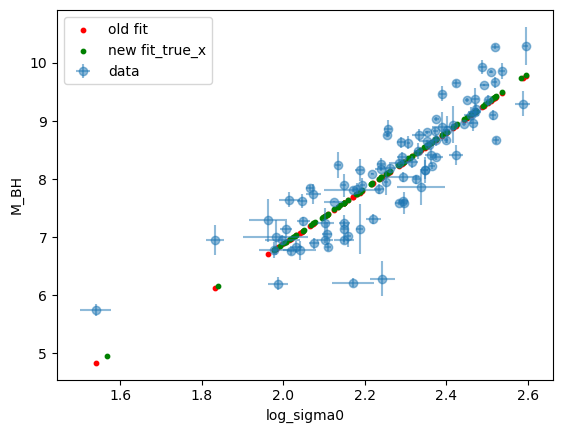

In [20]:
plt.errorbar(df['log_sigma0'],df['M_BH'],xerr=df['log_sigma0_std'],yerr=df['M_BH_std_sym'],fmt='o',label='data',alpha=0.5)
plt.scatter(df['log_sigma0'],str2equ(t_eq.iloc[106]['refit_equation'])(df['log_sigma0']),label='old fit',c='r',s=10)
plt.scatter(result.x[3:3+93],
            result.x[0]*(result.x[3:3+93] ** result.x[1]),
            label='new fit_true_x',c='g',s=10)
plt.xlabel('log_sigma0')
plt.ylabel('M_BH')
plt.legend()
# plt.xlim(2.5,2.6)
# plt.ylim(9,10)

In [24]:
import torch
from torch import nn, optim

# Convert the dataframe to PyTorch tensors
M_BH = torch.tensor(df['M_BH'].values, dtype=torch.float32)
M_BH_std_sym = torch.tensor(df['M_BH_std_sym'].values, dtype=torch.float32)

log_sigma0 = torch.tensor(df['log_sigma0'].values, dtype=torch.float32)
log_sigma0_std = torch.tensor(df['log_sigma0_std'].values, dtype=torch.float32)

# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.p0 = nn.Parameter(torch.tensor(2.7058925586206, dtype=torch.float32))
        self.p1 = nn.Parameter(torch.tensor(1.347835267603883, dtype=torch.float32))
        self.p2 = nn.Parameter(torch.tensor(t_eq.iloc[106]['intrinsic_scatter'], dtype=torch.float32))
        self.p3 = nn.Parameter(log_sigma0.clone())

    def forward(self, i):
        return self.p0 * (self.p3[i] ** self.p1)

# Instantiate the model
model = Model()

# Define the loss function
def loglikelihood():
    term0 = torch.log(torch.tensor(2 * torch.pi)) * len(df) * (t_eq.iloc[106]['unique_number_variables'] + 1)

    term1 = (torch.log(M_BH_std_sym**2 + model.p2**2)).sum()
    term1 += torch.log(log_sigma0_std**2).sum()

    term2 = ((M_BH - model(torch.arange(len(df))))**2 / (M_BH_std_sym**2 + model.p2**2)).sum()

    term3 = (((log_sigma0 - model.p3) / log_sigma0_std)**2).sum()


    term0 = np.log(2*np.pi)*len(df)*(t_eq.iloc[106]['unique_number_variables']+1)

    return term0 + term1 + term2 + term3

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loglikelihood()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}', model.p0.item(), model.p1.item(), model.p2.item())

# Get the optimized parameters
optimized_params = {name: param.data for name, param in model.named_parameters()}
print(optimized_params)

Epoch 0, Loss: -526.28369140625 2.7158925533294678 1.357835292816162 0.4349091649055481
Epoch 100, Loss: -532.427978515625 2.679016590118408 1.3609755039215088 0.41440749168395996
Epoch 200, Loss: -532.4676513671875 2.6550750732421875 1.3717252016067505 0.41416192054748535
Epoch 300, Loss: -532.4716186523438 2.6464242935180664 1.375624656677246 0.41404634714126587
Epoch 400, Loss: -532.4717407226562 2.6446118354797363 1.3764430284500122 0.4140239357948303
Epoch 500, Loss: -532.4717407226562 2.644381523132324 1.3765472173690796 0.4140213131904602
Epoch 600, Loss: -532.4716796875 2.6443634033203125 1.3765555620193481 0.41402092576026917
Epoch 700, Loss: -532.4717407226562 2.6443631649017334 1.3765556812286377 0.4140211343765259
Epoch 800, Loss: -532.4716796875 2.6443634033203125 1.3765556812286377 0.4140208661556244
Epoch 900, Loss: -532.4717407226562 2.6443634033203125 1.3765554428100586 0.41402101516723633
Epoch 1000, Loss: -532.4718627929688 2.644362449645996 1.3765558004379272 0.4140

In [27]:
df['M_BH']-model(torch.arange(len(df))).detach().numpy()

1      0.190236
3     -0.306278
6      0.825029
7     -0.016482
9     -0.708409
         ...   
131    0.217505
132    0.034799
133   -0.173304
134   -0.566103
142    0.509290
Name: M_BH, Length: 93, dtype: float64

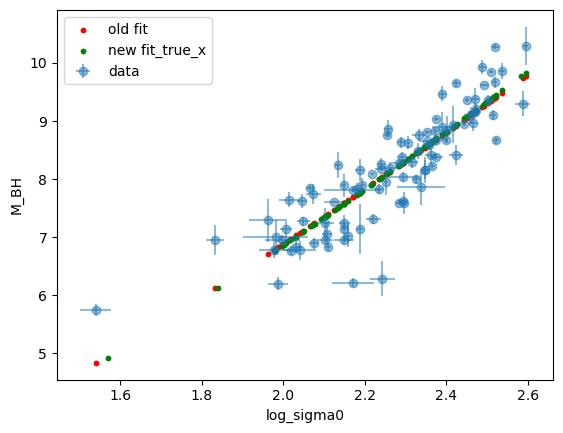

In [26]:
plt.errorbar(df['log_sigma0'],df['M_BH'],xerr=df['log_sigma0_std'],yerr=df['M_BH_std_sym'],fmt='o',label='data',alpha=0.5)
plt.scatter(df['log_sigma0'],str2equ(t_eq.iloc[106]['refit_equation'])(df['log_sigma0']),label='old fit',c='r',s=10)
plt.scatter(model.p3.detach().numpy(),model(torch.arange(len(df))).detach().numpy(),label='new fit_true_x',c='g',s=10)
plt.xlabel('log_sigma0')
plt.ylabel('M_BH')
plt.legend()